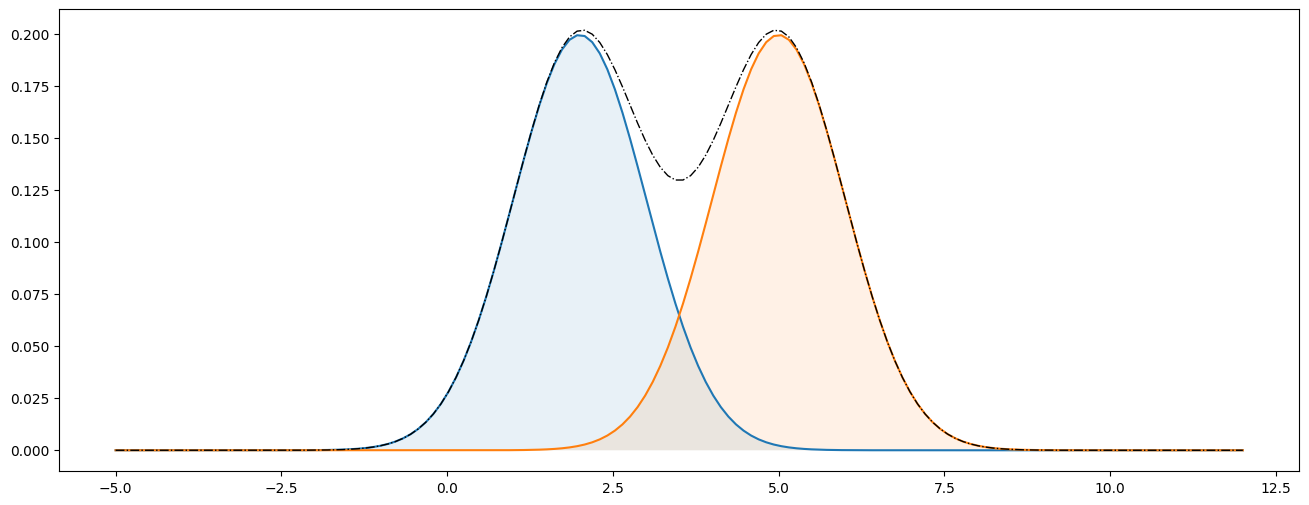

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

p = 0.5
ps = [p, 1-p]
mus = [2, 5]
generative_m = np.array([stats.norm(mus[0], 1), stats.norm(mus[1], 1)])

# plot the latent distributions
x = np.linspace(-5, 12, 150)
plt.figure(figsize=(16, 6))
plt.plot(x, ps[0]*generative_m[0].pdf(x))
plt.plot(x, ps[1]*generative_m[1].pdf(x))
plt.plot(x, ps[0]*generative_m[0].pdf(x) + ps[1]*generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx(ps[0]*generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(ps[1]*generative_m[1].pdf(x), x, alpha=0.1)

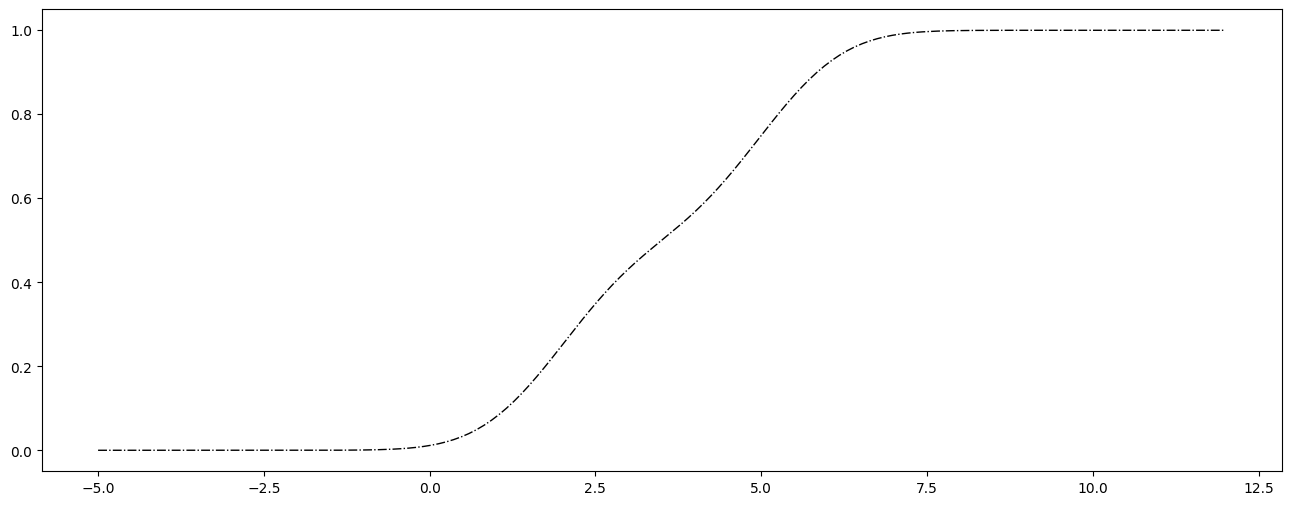

In [2]:
plt.figure(figsize=(16, 6))
plt.plot(x, ps[0]*generative_m[0].cdf(x) + ps[1]*generative_m[1].cdf(x), lw=1, ls='-.', color='black')

- **True Positive Rate** $=\mathbb{P}(\hat{Y}(X)=1|Y=1)$
- **False Positive Rate** $=\mathbb{P}(\hat{Y}(X)=1|Y=0)$

In [3]:
def compute_TPR_FPR(t, generative_m = generative_m):
    return 1-generative_m[1].cdf(t), 1-generative_m[0].cdf(t)

def compute_error(t, generative_m = generative_m, ps=ps):
    return ps[1]*generative_m[1].cdf(t)+ps[0]*(1-generative_m[0].cdf(t))

def compute_Precision_Recall(t, generative_m = generative_m, ps=ps):
    tpr, fpr = compute_TPR_FPR(t, generative_m)
    return ps[1]*tpr/(ps[0]*fpr+ps[1]*tpr), tpr

In [4]:
ts = np.linspace(-10, 10, 1000)
ROC = [compute_TPR_FPR(t) for t in ts]
errors = [compute_error(t) for t in ts]
accuracy = [1-compute_error(t) for t in ts]

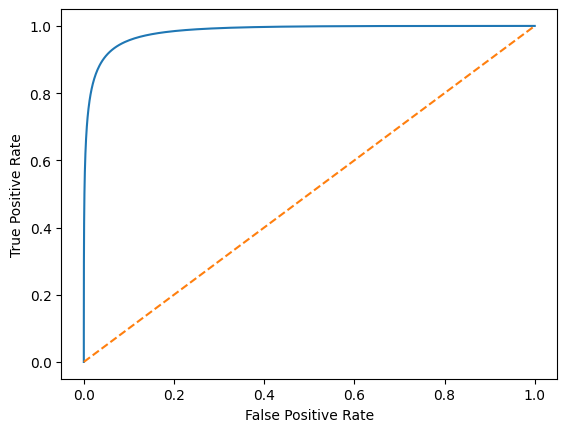

In [5]:
plt.plot([r[1] for r in ROC], [r[0] for r in ROC])
plt.plot(np.linspace(0, 1, 1000), np.linspace(0, 1, 1000), linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

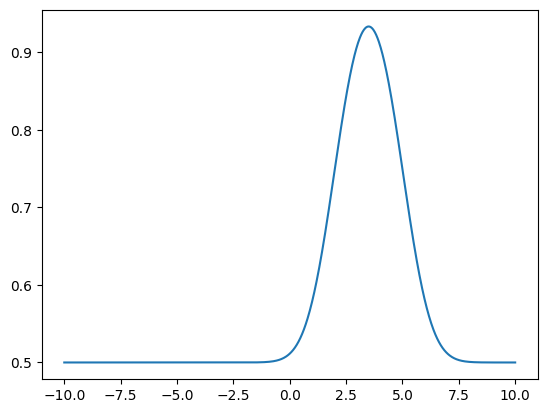

In [6]:
plt.plot(ts, accuracy);

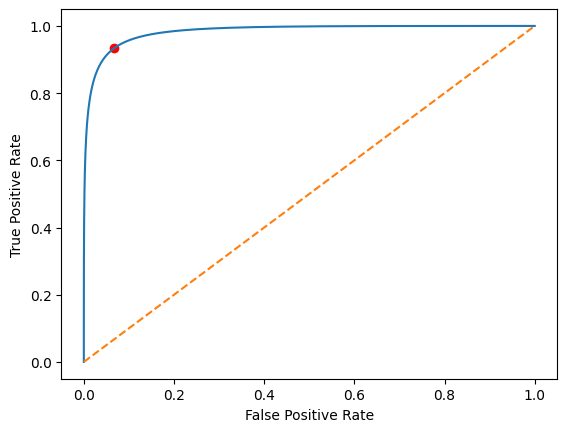

In [7]:
plt.plot([r[1] for r in ROC], [r[0] for r in ROC])
plt.scatter(compute_TPR_FPR(3.5)[1], compute_TPR_FPR(3.5)[0], color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(np.linspace(0, 1, 1000), np.linspace(0, 1, 1000), linestyle='--');

In [8]:
p_unbalanced = 0.90
ps_unbalanced = [p_unbalanced, 1-p_unbalanced]
accuracy_unbalanced = [1-compute_error(t, ps=ps_unbalanced) for t in ts]

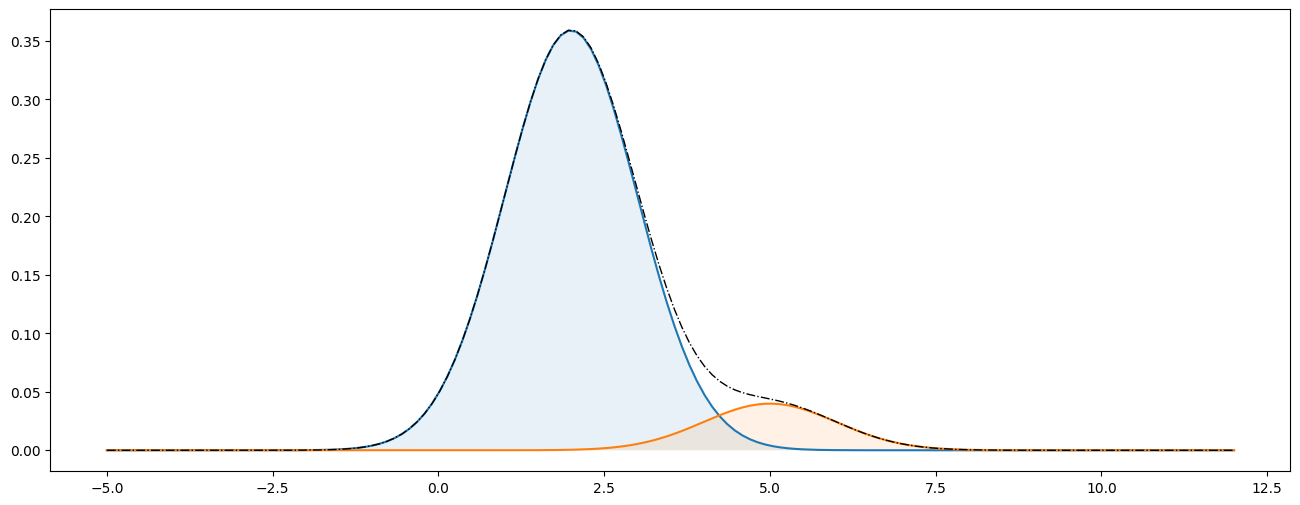

In [9]:
# plot the latent distributions
x = np.linspace(-5, 12, 150)
plt.figure(figsize=(16, 6))
plt.plot(x, ps_unbalanced[0]*generative_m[0].pdf(x))
plt.plot(x, ps_unbalanced[1]*generative_m[1].pdf(x))
plt.plot(x, ps_unbalanced[0]*generative_m[0].pdf(x) + ps_unbalanced[1]*generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx(ps_unbalanced[0]*generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(ps_unbalanced[1]*generative_m[1].pdf(x), x, alpha=0.1)

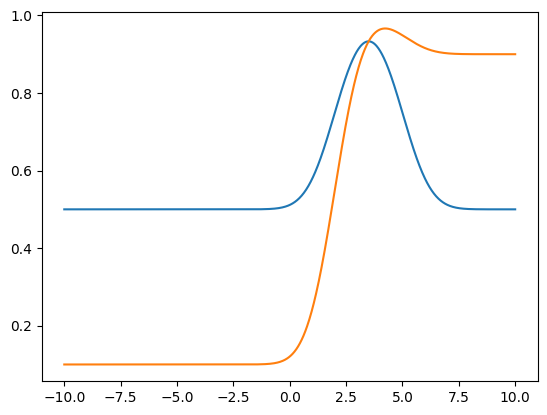

In [10]:
plt.plot(ts, accuracy)
plt.plot(ts, accuracy_unbalanced);

- **Recall = True Positive Rate**
- **Precision** $=\mathbb{P}(Y=1|\hat{Y}(X)=1)$

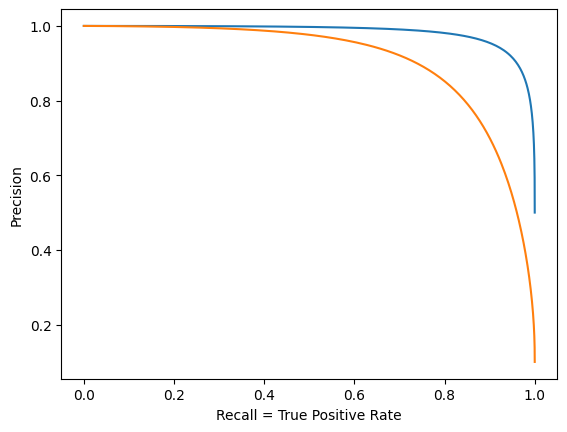

In [11]:
Prec_Rec = [compute_Precision_Recall(t) for t in ts]
Prec_Rec_unbalanced = [compute_Precision_Recall(t, ps=ps_unbalanced) for t in ts]
plt.plot([r[1] for r in Prec_Rec], [r[0] for r in Prec_Rec])
plt.plot([r[1] for r in Prec_Rec_unbalanced], [r[0] for r in Prec_Rec_unbalanced])
plt.ylabel('Precision')
plt.xlabel('Recall = True Positive Rate');